In [324]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import numpy.fft

In [325]:
def get_LT_NGP(ngrid, gridWidth, pos):
    LT_NGP = np.floor(pos/gridWidth)
    return LT_NGP



def get_rho(ngrid, gridWidth, LT_NGP, m):

    rho = np.zeros((ngrid,ngrid))

    if not(type(m) == int):
        for i in range(LT_NGP.shape[0]):
            gridCord = LT_NGP[i]
            rho[int(gridCord[0])][int(gridCord[1])] += m[i]
    else:
        for i in range(LT_NGP.shape[0]):
            gridCord  = LT_NGP[i]
            rho[int(gridCord[0])][int(gridCord[1])] += m
    
    rho /= gridWidth**2
    
    return rho



def get_kernel(ngrid,r0):
    x=np.fft.fftfreq(ngrid)*ngrid
    rsqr=np.outer(np.ones(ngrid),x**2)
    rsqr=rsqr+rsqr.T
    rsqr[rsqr<r0**2]=r0**2
    kernel=rsqr**-0.5
    return kernel



def get_potential(rho,kernel,ngrid):

    rhoFT= np.fft.rfft2(rho)
    kernelFT = np.fft.rfft2(kernel)
    pot = np.fft.irfft2(rhoFT*kernelFT,[ngrid,ngrid])
    return pot 


  
def get_force(ngrid,gridWidth, LT_NGP,pot):

    f = np.zeros((LT_NGP.shape[0],2))

    for i in range(LT_NGP.shape[0]):
        x  = int(LT_NGP[i][0])
        y =  int(LT_NGP[i][1])

        f[i][0] = (pot[(x+1) % ngrid][y]-pot[(x-1) % ngrid][y])/(2*gridWidth)
        f[i][1] = (pot[x][(y+1) % ngrid]-pot[x][(y-1) % ngrid])/(2*gridWidth)
    return f


def take_step(pos,v,f,dt):
    pos[:]=pos[:]+dt*v
    v[:]=v[:]+f*dt
    return pos, v


In [326]:
class particles:
    def __init__(self,npart=10000,ngrid=500, dx = 1, dt =0.02, soft=1,periodic=True):
        self.pos=np.empty([npart,2])
        self.m=np.empty(npart)
        self.f=np.empty([npart,2])
        self.v=np.empty([npart,2])
        self.kernel=[]
        self.npart=npart
        self.ngrid=ngrid
        self.gridWidth = dx
        self.dt = dt
        self.LT_NGP=np.empty([self.npart,2])
        self.rho=np.empty([self.ngrid,self.ngrid])
        self.pot=np.empty([self.ngrid,self.ngrid])
        
        self.soft=soft
        self.periodic=periodic

    def ics_2gauss(self):
        self.pos[:]=np.random.randn(self.npart,2)*(self.ngrid/12)+self.ngrid/2
        self.pos[:self.npart//2,0]=self.pos[:self.npart//2,0]-self.ngrid/5
        self.pos[self.npart//2:,0]=self.pos[self.npart//2:,0]+self.ngrid/5
        self.pos[:] = self.pos[:]%self.ngrid
        self.m =1
        self.v[:]=0
        self.v[:self.npart//2,1]=25
        self.v[self.npart//2:,1]=-25      



6250029.8806545865 1335377.3604732768 5582341.200417948


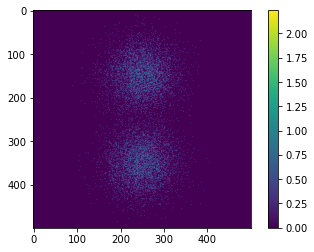

6250124.410325948 1335242.274488694 5582503.273081601


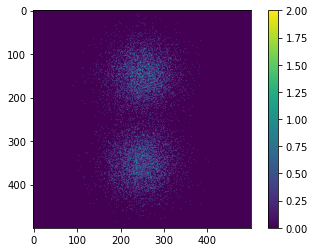

6250242.389192636 1335548.0348343411 5582468.371775465


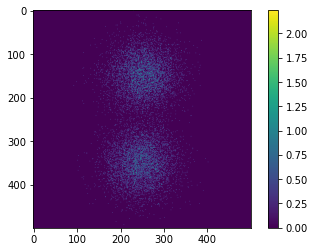

6250387.049937276 1335495.1148895707 5582639.49249249


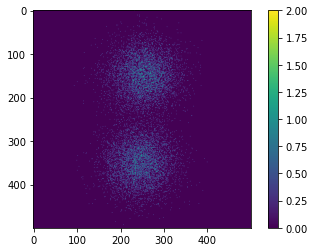

6250559.618428647 1335763.0752596408 5582678.080798826


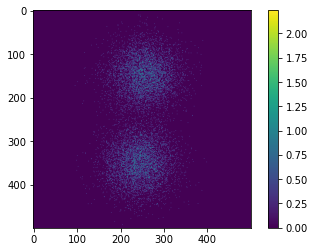

6250774.61512626 1335885.6464041707 5582831.791924174


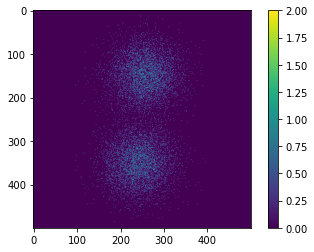

6251037.5967520755 1336193.5961002735 5582940.798701938


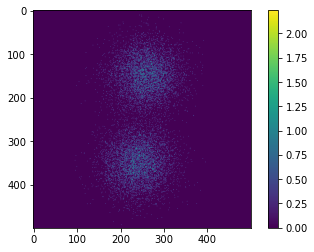

6251343.493067679 1336432.9985326093 5583126.993801374


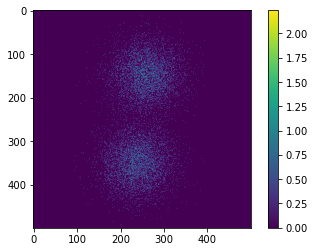

6251698.550719433 1336733.0604577267 5583332.02049057


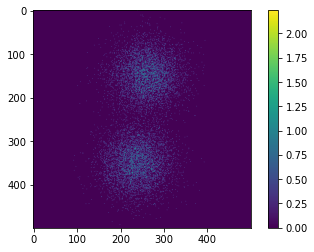

6252101.073181765 1337179.5267374092 5583511.309813061


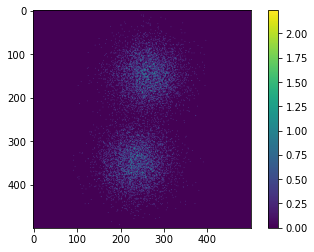

6252544.9702719115 1337622.0922441734 5583733.924149824


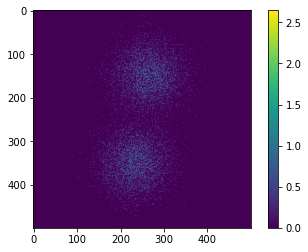

6253075.969676899 1338235.2066545277 5583958.366349635


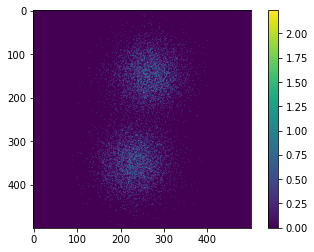

6253652.672726634 1338651.5822645454 5584326.881594362


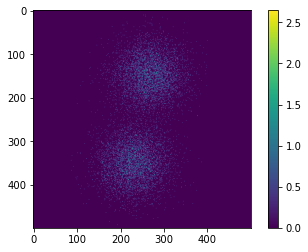

6254293.318438995 1339274.7954118561 5584655.920733066


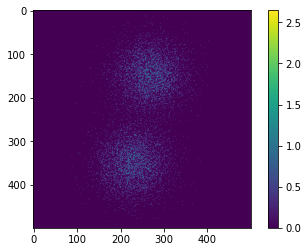

6255041.278460341 1340131.8393687103 5584975.358775985


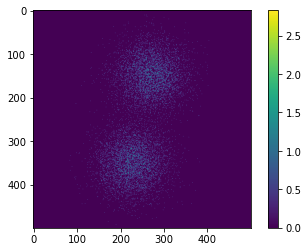

6255877.791167347 1340788.983228524 5585483.299553085


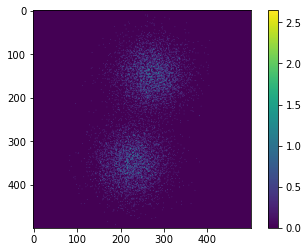

6256818.828986528 1341749.658892887 5585943.999540085


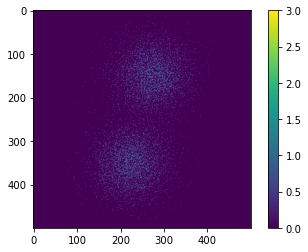

6257846.844200738 1342790.6660009564 5586451.511200259


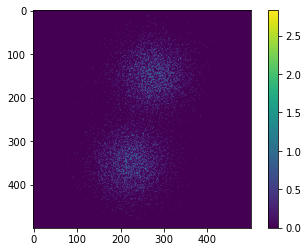

6258985.1420242395 1343842.4874174204 5587063.898315529


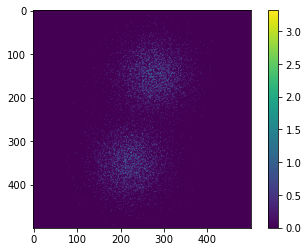

6260236.967584066 1345249.0191236872 5587612.458022223


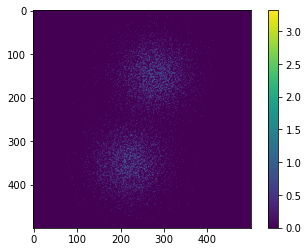

6261605.159719791 1346563.9176072876 5588323.200916148


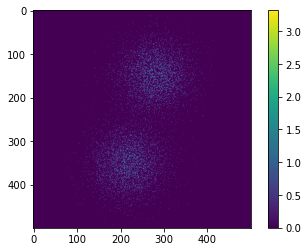

6263076.300048967 1348098.8971432792 5589026.851477327


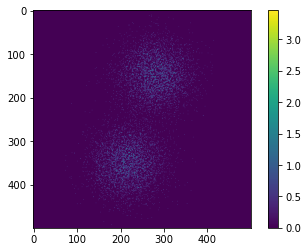

6264659.58078246 1349746.8146523628 5589786.173456279


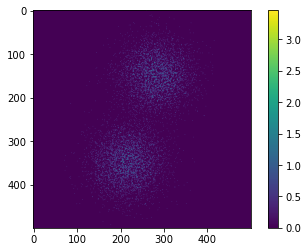

6266368.316348878 1351408.833349066 5590663.899674345


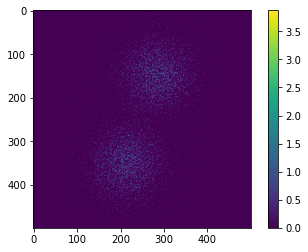

6268167.978959899 1353176.7819948168 5591579.587962491


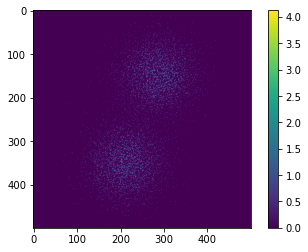

6270040.83123805 1355251.499211467 5592415.081632316


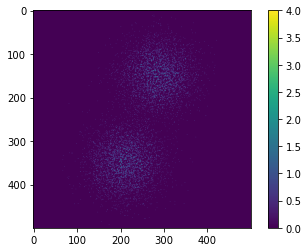

6272020.234701606 1357127.7863254556 5593456.341538878


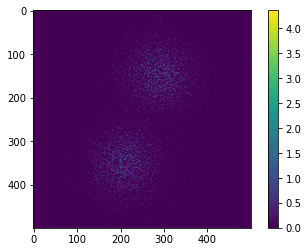

6274104.094712805 1359322.7290265071 5594442.730199551


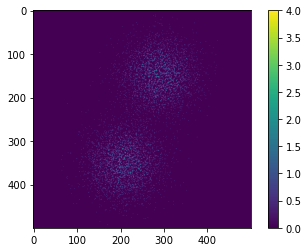

6276261.5715971915 1361746.9354253765 5595388.103884503


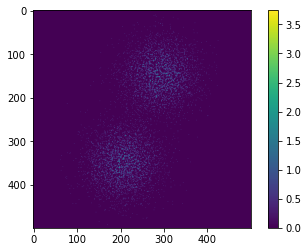

6278494.204117575 1363890.0255557792 5596549.191339685


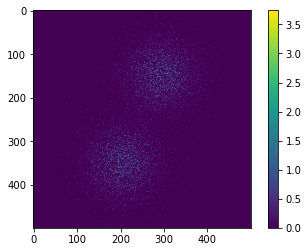

6280803.97450074 1366230.9311927375 5597688.508904371


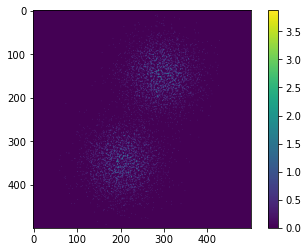

6283214.492140782 1368365.5863427909 5599031.6989693865


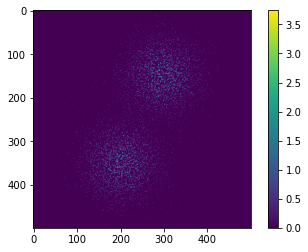

6285703.565630179 1370909.3614483934 5600248.884905982


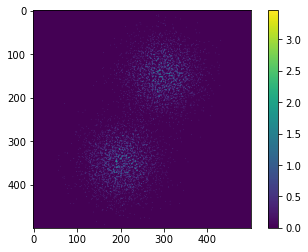

6288293.379478126 1373540.663356479 5601523.047799886


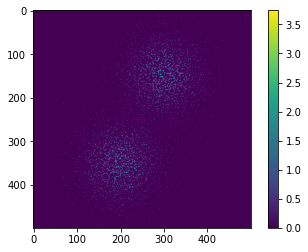

6290988.372319471 1376010.936425668 5602982.904106637


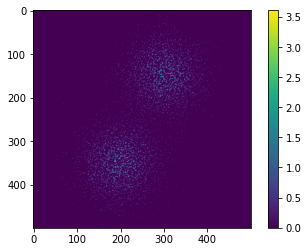

6293725.66869163 1378657.5615888909 5604396.887897184


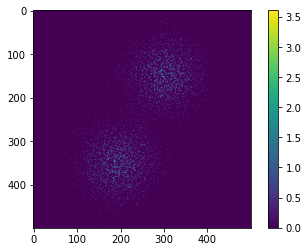

6296530.366183747 1381275.4691878553 5605892.631589819


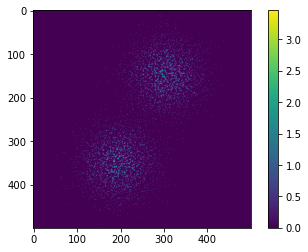

6299413.506321449 1384319.9572864356 5607253.527678231


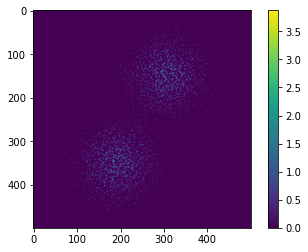

6302343.6869199835 1387001.7233940093 5608842.825222978


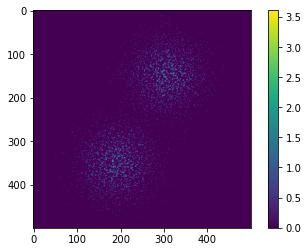

6305350.572117176 1389873.957777861 5610413.593228245


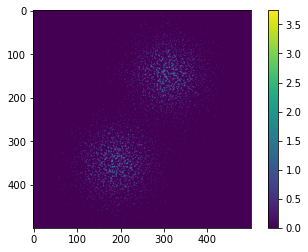

6308438.477501891 1393152.6806188 5611862.1371924905


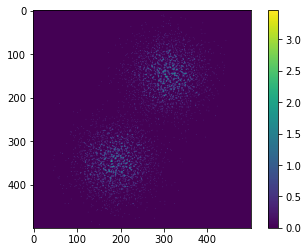

6311622.546674278 1396009.1979370909 5613617.947705733


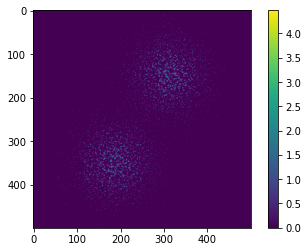

6314957.335411743 1398975.1668466756 5615469.751988405


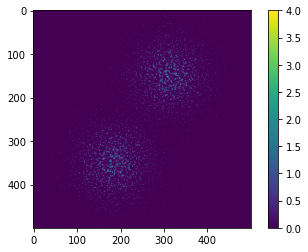

6318424.412607299 1402188.4464793978 5617330.1893676


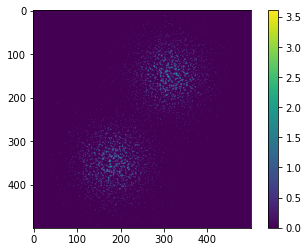

6322092.1784483325 1405219.5833678723 5619482.386764396


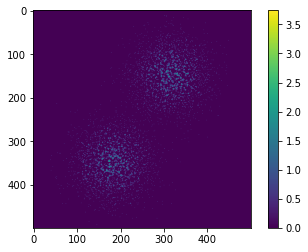

6326044.201972494 1409336.1471871769 5621376.128378905


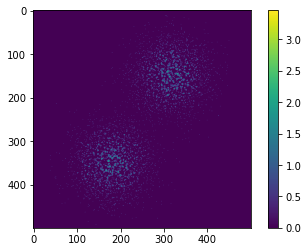

6330325.8912764685 1413537.6651862175 5623557.05868336


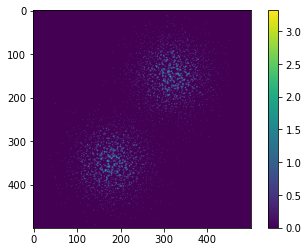

KeyboardInterrupt: 

In [327]:
parts=particles()


parts.ics_2gauss()
parts.kernel = get_kernel(parts.ngrid, parts.soft)

plt.ion()
osamp=3

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
crap=ax.imshow(parts.rho[:parts.ngrid,:parts.ngrid]**0.5)

for i in range(1500):
    for j in range(osamp):
        parts.LT_NGP = get_LT_NGP(parts.ngrid, parts.gridWidth, parts.pos)
        parts.rho = get_rho(parts.ngrid, parts.gridWidth, parts.LT_NGP, parts.m)
        parts.pot = get_potential(parts.rho, parts.kernel, parts.ngrid )
        parts.f = get_force(parts.ngrid, parts.gridWidth, parts.LT_NGP, parts.pot)
        parts.pos, parts.v = take_step(parts.pos, parts.v, parts.f, parts.dt)
    kin=np.sum(parts.v**2)
    pot=np.sum(parts.rho*parts.pot)
    print(kin,pot,kin-0.5*pot)
    plt.clf()
    plt.imshow(parts.rho**0.5)#,vmin=0.9,vmax=1.1)
    plt.colorbar()


    crap.set_data(parts.rho[:parts.ngrid,:parts.ngrid]**0.5)
    plt.pause(0.001)

In [ ]:

ngrid = 100
npart = 100000
data = np.random.randn(npart,2)*(ngrid/12)+ngrid/2
rho = get_rho(ngrid,1,data,1)

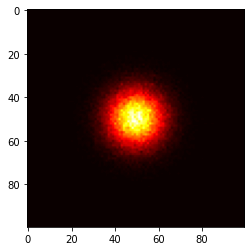

In [ ]:
plt.imshow(rho, cmap='hot')